In [161]:
include("../src/helper.jl")
include("../src/hamiltonian.jl")
# using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("Expokit")
using Random
include("../src/time_evolve.jl")


solve_trotter (generic function with 1 method)

In [162]:
n=4
m=2

device = Device(n,m)
Hstatic = static_hamiltonian(device,m)
display(Hstatic)


16×16 Hermitian{Float64, Matrix{Float64}}:
 0.0   0.0        0.0        0.0       …    0.0         0.0         0.0
 0.0  35.6965     0.121046   0.0            0.0         0.0         0.0
 0.0   0.121046  34.6049     0.0            0.0         0.0         0.0
 0.0   0.0        0.0       70.3014         0.0         0.0         0.0
 0.0   0.113962   0.118052   0.0            0.0         0.0         0.0
 0.0   0.0        0.0        0.118052  …    0.0         0.0         0.0
 0.0   0.0        0.0        0.113962       0.0         0.0         0.0
 0.0   0.0        0.0        0.0            0.0         0.0         0.0
 0.0   0.0        0.0        0.0            0.0         0.0         0.0
 0.0   0.0        0.0        0.0            0.0         0.0         0.0
 0.0   0.0        0.0        0.0       …    0.0         0.0         0.0
 0.0   0.0        0.0        0.0            0.118052    0.113962    0.0
 0.0   0.0        0.0        0.0            0.0         0.0         0.0
 0.0   0.0        0.0

In [163]:
basis_ = cbas_(m, n)
# Dressing the Hamiltonian
basis_ = cbas_(m, n)
Hamdbas = dresser(Hstatic, basis_)
# Time-dependent Hamiltonian
Hdrive = t_ham(m, n)
hdrive = mtdressed(Hamdbas, Hdrive)

4-element Vector{Any}:
 SparseMatrixCSC{Float64, Int64}[sparse([9, 10, 11, 13, 10, 11, 13, 12, 14, 15, 10, 11, 13, 12, 14, 15, 12, 14, 15, 16], [1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8], [1.0, 1.0, 4.6847081228858574e-15, 0.0, -4.7364642846529656e-15, 0.9999999999999997, 0.0, -0.9871599154570704, -0.13588446854884578, -0.08396852101822064, 0.0, 0.0, 1.0, -0.1358844685488461, 0.9907080508975766, -0.005741871987572534, -0.0839685210182204, -0.005741871987576111, 0.9964518645594934, 1.0], 16, 16), sparse([1, 2, 3, 5, 2, 3, 5, 4, 6, 7, 2, 3, 5, 4, 6, 7, 4, 6, 7, 8], [9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16], [1.0, 1.0, -4.7364642846529656e-15, 0.0, 4.6847081228858574e-15, 0.9999999999999997, 0.0, -0.9871599154570704, -0.1358844685488461, -0.0839685210182204, 0.0, 0.0, 1.0, -0.13588446854884578, 0.9907080508975766, -0.005741871987576111, -0.08396852101822064, -0.005741871987572534, 0.9964518645594934, 1.0], 16, 16)]
 SparseMatrixCSC{F

In [164]:
# TOTAL SIZE OF HIBLERT SPACE BEING SIMULATED
N = m^n
init_ket = "1"^(n÷2) * "0"^(n÷2)

"1100"

In [165]:
# PREPARE THE HARTREE-FOCK STATE
ψ0 = zeros(ComplexF64, N)                               # INITIALIZE ⟨z|ψ0⟩ = 0
ψ0[1 + parse(Int, init_ket, base=m)] = one(ComplexF64)  # SET ⟨init_ket|ψ0⟩ = 1
display(ψ0)

16-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [166]:
    # State indices

states = [sum(digits(i, base=2, pad=n) .* (m .^ (0:n-1))) for i in 0:(2^n-1)]

if n == 2
    istate = [0, 1]
elseif n == 4
    istate = [0, 0, 1, 1]
elseif n == 6
    istate = [0, 0, 1, 0, 0, 1]
else
    error("Provide initial state using initial_state function")
end


4-element Vector{Int64}:
 0
 0
 1
 1

In [167]:
display(init_ket)

qch=build_quantum_computer_hamiltonian(device, m,ψ0)
println("the number of qubits is ", qch.n)  
println("the number of states is ",qch.m)
println("omegas ",qch.omegas)
println("deltas ",qch.deltas)
println("g ")
display(qch.g)
println("basis ")
display(qch.basis)
println("a ")
display(qch.a)
println("Hdrive ")
display(qch.Hdrive)
println("dsham ")
display(qch.dsham)



"1100"

4×4 Matrix{Float64}:
 0.0       0.124808  0.123612  0.125429
 0.124808  0.0       0.118052  0.113962
 0.123612  0.118052  0.0       0.121046
 0.125429  0.113962  0.121046  0.0

16×16 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

4-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 1.0; 0.0 0.0 … 0.0 0.0]

4-element Vector{Vector{SparseMatrixCSC{ComplexF64, Int64}}}:
 [sparse([9, 10, 11, 13, 10, 11, 13, 12, 14, 15, 10, 11, 13, 12, 14, 15, 12, 14, 15, 16], [1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 4.6847081228858574e-15 + 0.0im, 0.0 + 0.0im, -4.7364642846529656e-15 + 0.0im, 0.9999999999999997 + 0.0im, 0.0 + 0.0im, -0.9871599154570704 + 0.0im, -0.13588446854884578 + 0.0im, -0.08396852101822064 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.0 + 0.0im, -0.1358844685488461 + 0.0im, 0.9907080508975766 + 0.0im, -0.005741871987572534 + 0.0im, -0.0839685210182204 + 0.0im, -0.005741871987576111 + 0.0im, 0.9964518645594934 + 0.0im, 1.0 + 0.0im], 16, 16), sparse([1, 2, 3, 5, 2, 3, 5, 4, 6, 7, 2, 3, 5, 4, 6, 7, 4, 6, 7, 8], [9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, -4.7364642846529656e-15 + 0.0im, 0.0 + 0.0im, 4.6847081228858574e-15 + 0.0im, 0.9999999999999997 + 0.0im, 0.0 + 0.0i

16×16 SparseMatrixCSC{Float64, Int64} with 39 stored entries:
⠰⢆⢆⡀⠀⠀⠀⠀
⠈⠱⠱⢆⠀⠀⠀⠀
⠀⠀⠀⠀⠱⢆⢆⡀
⠀⠀⠀⠀⠈⠱⠱⢆

In [168]:
# PULSE CONSTRAINTS
ΔΩ = 2π * 0.02      # RANGE OF PULSE AMPLITUDE
ΔΔ = 2π * 0.10      # RANGE OF DE-TUNING

0.6283185307179586

In [169]:
# PULSE HYPER-PARAMETERS
T = 40.0        # TOTAL PULSE DURATION
W = 100          # NUMBER OF PULSE WINDOWS
steptimes = repeat( range(0,T,W+1)[2:end-1], 1, n)      # PULSE WINDOW STEP TIMES

99×4 Matrix{Float64}:
  0.4   0.4   0.4   0.4
  0.8   0.8   0.8   0.8
  1.2   1.2   1.2   1.2
  1.6   1.6   1.6   1.6
  2.0   2.0   2.0   2.0
  2.4   2.4   2.4   2.4
  2.8   2.8   2.8   2.8
  3.2   3.2   3.2   3.2
  3.6   3.6   3.6   3.6
  4.0   4.0   4.0   4.0
  ⋮                
 36.4  36.4  36.4  36.4
 36.8  36.8  36.8  36.8
 37.2  37.2  37.2  37.2
 37.6  37.6  37.6  37.6
 38.0  38.0  38.0  38.0
 38.4  38.4  38.4  38.4
 38.8  38.8  38.8  38.8
 39.2  39.2  39.2  39.2
 39.6  39.6  39.6  39.6

In [170]:
# DISCRETIZE TIME
r=100
t_= range(0,T,r+1)                 # TIME GRID
τ = T / r                          # DURATION OF EACH TIME STEP

0.4

In [171]:
"""
    constructpulse(x::AbstractVector{<:Real})

This function constructs a set of pulse objects for each qubit,
    out of a vector of optimizable parameters.

In this example, each pulse will be a sequence of `W` square pulses.

The vector `x` must specify:
- `W` different amplitudes A[j]
- a single ν, for the frequency of the pulse.

Actually, `x` must specify each of these for all `n` qubits,
    for a total of `n(W+1)` parameters.

"""

function constructpulses(x::AbstractVector{<:Real}, n::Int, T::Float64, W::Int, steptimes::AbstractMatrix{<:Real})
    x = reshape(x, :, n)               # Reshape `x` into W+1 rows and `n` columns (amplitude + frequency for each qubit)

    amp = Vector{Vector{Float64}}(undef, n)  # Initialize amplitude storage
    tseq = Vector{Vector{Float64}}(undef, n) # Initialize time sequence storage
    freq = Vector{Float64}(undef, n)         # Initialize frequency storage

    # Extract amplitudes, frequencies, and step times for each qubit
    for q in 1:n
        amp[q] = x[1:W, q]            # Extract amplitude values for qubit q
        freq[q] = x[W+1, q]           # Extract frequency (detuning) for qubit q
        tseq[q] = steptimes[:, q]     # Use provided step times for qubit q
    end

    # Return the Pulsec object
    return Pulsec(n, amp, tseq, freq, T)
end





constructpulses (generic function with 2 methods)

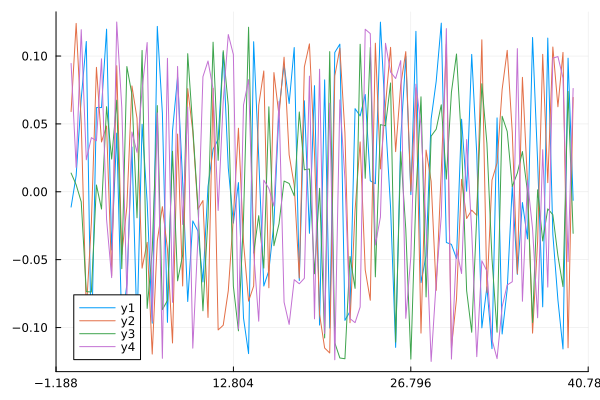

In [172]:
# Example Parameters
# CONFIGURE INITIAL PARAMETERS
Random.seed!(0)                         # CHANGE SEED AT WILL!
x0 = Matrix{Float64}(undef, W+1, n)
# # #
x0[1:W,:] .= ΔΩ * (2*rand(W,n) .- 1)                        # RANDOMLY SELECTED AMPLITDUES
x0[end,:] .= ΔΔ * (2*rand(n) .- 1) .+ device.omegas             # RANDOMLY SELECTED FREQUENCIES
x0 = vec(x0)      
n = 4                               # Number of qubits
T = 40.0                            # Total pulse duration
W = 100                             # Number of pulse windows
ΔΩ = 2π * 0.02                      # Range of pulse amplitude
ΔΔ = 2π * 0.10                      # Range of detuning
steptimes = repeat(range(0, T, W + 1)[1:end-1], 1, n)  # Step times for pulses
r = 100                             # Discretization points

# Construct the pulses with constraints
pulses = constructpulses(x0, n, T, W, steptimes)

# Check the output
println("Pulses: ", pulses)
println("Amplitudes: ", pulses.amp)
println("Frequencies: ", pulses.freq)
println("Step times: ", pulses.tseq)
println("Total duration: ", pulses.duration)
pulses.amp[1]
pulses.amp[2]
pulses.amp[3]
pulses.amp[4]
pulses.tseq[1]
plot(pulses.tseq[1], pulses.amp[1])
plot!(pulses.tseq[2], pulses.amp[2])
plot!(pulses.tseq[3], pulses.amp[3])
plot!(pulses.tseq[4], pulses.amp[4])

In [173]:

display(pulses)
ini_vec=ψ0




Pulsec(4, [[-0.011249813108442025, 0.01197385363019712, 0.06870123475450514, 0.11073104329455404, -0.11821243821287042, 0.06206352369246523, 0.06202782938809193, 0.11980021288044203, -0.04289270051112667, 0.043228485413742794  …  -0.03471229061344607, 0.11366649261455278, 0.022043146164581126, -0.0847656321633049, 0.11323278629423282, -0.03131546902816518, -0.07974259593250614, -0.11579642531059682, 0.09841764612585469, -0.006286772321924097], [0.059088635680018674, 0.12404335180588921, 0.05119390634114558, -0.08775790948219787, -0.022768749779524148, 0.09167303186516455, 0.036713800184636616, 0.0484530456418127, -0.061802226350038736, 0.09288539759614117  …  0.0067867862923724626, -0.10413509846333588, -0.03635744195046457, 0.10124385712035511, 0.006715468800125902, 0.10665830225625862, 0.06264070869131672, 0.10267003781051283, -0.11492098101490669, 0.06946245382291301], [0.01379632589071568, 0.005186829329378982, -0.007416411374622033, -0.07355252676831944, -0.07381933248454078, 0.00

16-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [175]:
final_state_trotter=evolve(ini_vec, pulse, qch, solver="trotter", nstep=2000, twindow=true)


16-element Vector{ComplexF64}:
    0.31489624161692703 - 0.5338032882071656im
   0.013552879967461113 + 0.010633721111136632im
    -0.0803681431795723 - 0.08335475395233298im
  0.0010234558098378684 + 0.0007777511100195145im
    -0.1380818811747734 - 0.38820510859552243im
   -0.05783535496097458 + 0.01229557703683267im
    0.14072807831130676 - 0.0038946412236362847im
 -0.0011469766514295516 + 0.013622880213011371im
    0.48515481042529474 + 0.17421921899264373im
 -0.0065793094408022525 + 0.012728370712232264im
    0.05559911334187027 - 0.07863747543629693im
  0.0009520997989635147 - 0.00438785567818279im
     0.2956994235331053 - 0.17323410555506388im
   -0.01894894014218595 - 0.04570715389222605im
    0.02514266647154168 + 0.11415166515241422im
  -0.011309235090295817 + 0.0011828455320865836im

In [176]:
final_state_ode=evolve(ini_vec, pulse, qch, solver="ode", nstep=2000, twindow=true)
display(final_state_trotter)
display(final_state_ode)

16-element Vector{ComplexF64}:
    0.31489624161692703 - 0.5338032882071656im
   0.013552879967461113 + 0.010633721111136632im
    -0.0803681431795723 - 0.08335475395233298im
  0.0010234558098378684 + 0.0007777511100195145im
    -0.1380818811747734 - 0.38820510859552243im
   -0.05783535496097458 + 0.01229557703683267im
    0.14072807831130676 - 0.0038946412236362847im
 -0.0011469766514295516 + 0.013622880213011371im
    0.48515481042529474 + 0.17421921899264373im
 -0.0065793094408022525 + 0.012728370712232264im
    0.05559911334187027 - 0.07863747543629693im
  0.0009520997989635147 - 0.00438785567818279im
     0.2956994235331053 - 0.17323410555506388im
   -0.01894894014218595 - 0.04570715389222605im
    0.02514266647154168 + 0.11415166515241422im
  -0.011309235090295817 + 0.0011828455320865836im

16-element Vector{ComplexF64}:
    0.3128138729243678 - 0.5350026223894823im
  0.012937552567510604 + 0.010511973461066724im
  -0.08154731120144788 - 0.08463393393183488im
 0.0011638869479362538 + 0.0006424986139193711im
  -0.13615632820087756 - 0.3877933026033155im
  -0.05820569026690766 + 0.012274993047214886im
   0.14145974828239677 - 0.0029575160386712995im
 -0.001193374677911328 + 0.013852039715666882im
   0.48578059936306356 + 0.1731698747236636im
 -0.006597763492397599 + 0.012202420307349643im
   0.05661231633454099 - 0.07975133226969046im
 0.0008891360305479591 - 0.004502068784867472im
    0.2960736639307924 - 0.17122146834726587im
  -0.01894143031747681 - 0.046079122268629584im
  0.024315825948910186 + 0.11498076708184815im
 -0.011511151530881274 + 0.0011633095196068323im

In [178]:

# EXTEND OBSERVABLE ONTO SIMULATION SPACE
Π = projector(n, 2, m)    # PROJECTOR FROM SIMULATION SPACE ONTO PROBLEM SPACE
O = Hermitian(Π'*Hstatic*Π)           # MOLECULAR HAMILTONIAN, EMBEDDED INTO SIMULATION SPACE
energy=expectation(O, final_state_ode)

27.60073712450962 - 9.723125082850004e-16im